# Chargement des données

In [0]:
# On importe les librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [0]:
#On importe le dataset global en précisant qu'il s'agit de time series (squeeze = True)

df = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
GOLD_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,16589132426,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,16887922522,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,16496129470,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,16634910472,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,16193326033,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


# Exploration des données

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


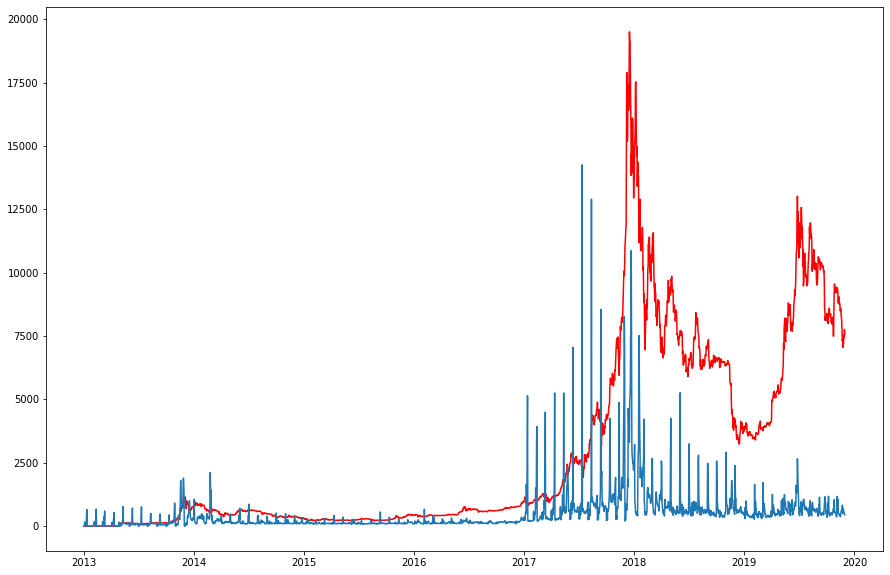

In [0]:
# On affiche Google Trends et le cours du Bitcoin BTC_Close sur le même graphique

plt.figure(figsize=(15,10))
plt.plot(df.BTC_Close, color='r')
plt.plot(df.GGTrends_values*50)
plt.show()

In [0]:
# On affiche les corrélations les plus grandes en valeur absolues

df.corr()['BTC_Close'].sort_values(ascending=True)[:20]
# On constate la grande corrélation entre les différents Altcoins et les recherches Google avec le BTC_Close

ICE_Close       -0.660399
ICE_High        -0.660199
ICE_Low         -0.659935
ICE_Open        -0.659837
CNYUSD_Low      -0.519462
CNYUSD_Open     -0.518139
CNYUSD_Close    -0.517418
CNYUSD_High     -0.517044
IBM_Close       -0.491645
IBM_High        -0.491559
IBM_Low         -0.490308
IBM_Open        -0.484886
GPS_Low         -0.427402
GPS_Close       -0.426486
GPS_Open        -0.426060
GPS_High        -0.424504
IBM_Volume      -0.405275
GPS_Volume      -0.380256
ICE_Volume      -0.355073
GOOGLE_Volume   -0.251581
Name: BTC_Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


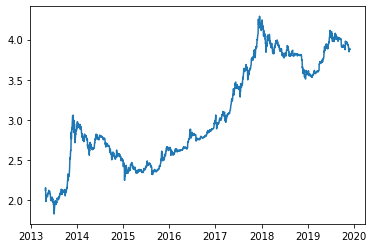

In [0]:
# On affiche le log10 du BTC_Close pour explorer les données
plt.plot(np.log10(df.BTC_Close))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


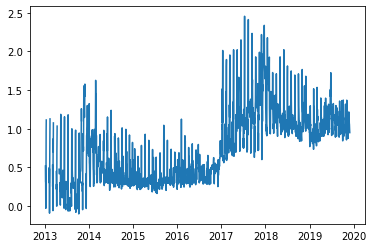

In [0]:
# On affiche également le log10 de Google Trends
plt.plot(np.log10(df.GGTrends_values))

# Préparation des données (Preprocessing)

In [0]:
# On définit une fonction qui récupère pour chaque ligne (date) les nb_day valeurs passées avec un décalage de nb_decal
# et réplique les colonnes val_exp (valeurs explicatives), chacune dans une nouvelle colonne et les juxtapose au colonnes
# contenues dans val_pred qui restent inchangées et non décalées. Cette fonction renvoie un nouveau DataFrame qui contient cette transformation
def Create_Df_Test_dec(df, val_pred, val_exp, nb_day, nb_decal):
    df2 = pd.DataFrame()
    df2['Date'] = df['GOLD_Time']
    
    # On récupère les colonnes à prédire
    for col_pred in val_pred:
        df2[col_pred] = df[col_pred]
    
    # Pour chacune des colonnes indicatives, on va récupérer les n-nb_day valeurs
    for col_exp in val_exp:
        for ii in range(nb_decal-1, nb_day):
            nb_col = ii+1
            new_col = col_exp + '_' + str(nb_col)
            df2[new_col] = 0.0
            for jj in range(len(df)):
                if ((jj+ii+1) >= len(df)):
                    df2[new_col].values[jj] = np.nan
                else:
                    df2[new_col].values[jj] = (df[col_exp].values[jj+ii+1])
    df2 = df2.set_index('Date')    
    return df2

In [3]:
# On charge à nouveau le fichier dans un DataFrame en précisant qu'il s'agit d'un TimeSeries de la colonne 0. On ne définit pas d'Index.
df_in = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 squeeze=True)
df_in.head()

,GOLD_Time,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
0,2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
1,2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2,2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
3,2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
4,2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [5]:
# On précise les colonnes à répliquer et les colonnes à garder dans les deux listes val_pred et val_exp. La première colonne dans l'ordre de val_pred sera la valeur à prédire.
val_pred = ['BTC_Close', 'Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']
val_exp = list(set(df_in.columns) - set(val_pred))


#On fait appel à la fonction pour transformer notre DataFrame et l'enregistrer dans df_out
df_out = Create_Df_Test_dec(df_in, val_pred, val_exp, 7, 1)

df_out.head(5)

,BTC_Close,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin,IEF_Volume_1,IEF_Volume_2,IEF_Volume_3,IEF_Volume_4,IEF_Volume_5,IEF_Volume_6,IEF_Volume_7,XRP_Close_1,XRP_Close_2,XRP_Close_3,XRP_Close_4,XRP_Close_5,XRP_Close_6,XRP_Close_7,EURHUF_Low_1,EURHUF_Low_2,EURHUF_Low_3,EURHUF_Low_4,EURHUF_Low_5,EURHUF_Low_6,EURHUF_Low_7,BSV_Low_1,BSV_Low_2,BSV_Low_3,BSV_Low_4,BSV_Low_5,BSV_Low_6,BSV_Low_7,IEF_Low_1,IEF_Low_2,IEF_Low_3,IEF_Low_4,IEF_Low_5,...,ADA_Volume_3,ADA_Volume_4,ADA_Volume_5,ADA_Volume_6,ADA_Volume_7,LTC_Intraday_1,LTC_Intraday_2,LTC_Intraday_3,LTC_Intraday_4,LTC_Intraday_5,LTC_Intraday_6,LTC_Intraday_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,EURHUF_Open_1,EURHUF_Open_2,EURHUF_Open_3,EURHUF_Open_4,EURHUF_Open_5,EURHUF_Open_6,EURHUF_Open_7,AMD_Low_1,AMD_Low_2,AMD_Low_3,AMD_Low_4,AMD_Low_5,AMD_Low_6,AMD_Low_7,EURHUF_Close_1,EURHUF_Close_2,EURHUF_Close_3,EURHUF_Close_4,EURHUF_Close_5,EURHUF_Close_6,EURHUF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,7569,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16,1798695.0,0.0,2334424.0,3578750.0,3567926.0,0.0,0.0,0.230217,0.224570,0.225081,0.222145,0.218622,0.223184,0.236188,332.296,332.296,332.296,332.296,332.296,332.296,332.296,106.24,105.58,100.94,104.20,94.52,100.41,93.89,111.440,111.660,111.605,111.850,111.675,...,76841561.0,57431470.0,96694224.0,62998664.0,58979321.0,2.23,1.53,3.08,1.88,4.31,4.05,1.93,16.61,16.91,16.91,17.01,17.16,16.93,16.93,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.020,39.410,39.080,38.815,39.510,39.150,39.150,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-29,7761,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16,0.0,2334424.0,3578750.0,3567926.0,0.0,0.0,1876824.0,0.224570,0.225081,0.222145,0.218622,0.223184,0.236188,0.231600,332.296,332.296,332.296,332.296,332.296,332.296,332.296,105.58,100.94,104.20,94.52,100.41,93.89,89.45,111.660,111.605,111.850,111.675,111.690,...,57431470.0,96694224.0,62998664.0,58979321.0,93310136.0,1.53,3.08,1.88,4.31,4.05,1.93,6.50,16.91,16.91,17.01,17.16,16.93,16.93,16.93,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.410,39.080,38.815,39.510,39.150,39.150,38.190,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-28,7463,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16,2334424.0,3578750.0,3567926.0,0.0,0.0,1876824.0,3032639.0,0.225081,0.222145,0.218622,0.223184,0.236188,0.231600,0.243766,332.296,332.296,332.296,332.296,332.296,332.296,332.296,100.94,104.20,94.52,100.41,93.89,89.45,97.51,111.605,111.850,111.675,111.690,111.690,...,96694224.0,62998664.0,58979321.0,93310136.0,67101708.0,3.08,1.88,4.31,4.05,1.93,6.50,5.29,16.91,17.01,17.16,16.93,16.93,16.93,16.21,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.080,38.815,39.510,39.150,39.150,38.190,38.641,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-27,7531,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16,3578750.0,3567926.0,0.0,0.0,1876824.0,3032639.0,3837887.0,0.222145,0.218622,0.223184,0.236188,0.231600,0.243766,0.251364,332.296,332.296,332.296,332.296,332.296,332.296,332.296,104.20,94.52,100.41,93.89,89.45,97.51,106.23,111.850,111.675,111.690,111.690,111.605,...,62998664.0,58979321.0,93310136.0,67101708.0,69854304.0,1.88,4.31,4.05,1.93,6.50,5.29,1.57,17.01,17.16,16.93,16.93,16.93,16.21,16.28,332.296,332.296,332.296,332.296,332.296,332.296,332.296,38.815,39.510,39.150,39.150,38.190,38.641,40.070,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-26,7218,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16,3567926.0,0.0,0.0,1876824.0,3032639.0,3837887.0,8306266.0,0.218622,0.223184,0.236188,0.231600,0.243766,0.251364,0.256500,332.296,332.296,332.296,332.296,332.296,332.296,332.296,94.52,100.41,93.89,89.45,97.51,106.23,107.44,111.675,111.690,111.690,111.605,111.570,...,58979321.0,93310136.0,67101708.0,69854304.0,91311583.0,4.31,4.05,1.93,6.50,5.29,1.57,2.65,17.16,

In [0]:
# On remplace les NaN par 0
df_out = df_out.fillna(0)

In [7]:
# On divise en data (explicatives) et target
data = df_out.iloc[:, 1:]
target = df_out['BTC_Close']
data.head()

,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin,IEF_Volume_1,IEF_Volume_2,IEF_Volume_3,IEF_Volume_4,IEF_Volume_5,IEF_Volume_6,IEF_Volume_7,XRP_Close_1,XRP_Close_2,XRP_Close_3,XRP_Close_4,XRP_Close_5,XRP_Close_6,XRP_Close_7,EURHUF_Low_1,EURHUF_Low_2,EURHUF_Low_3,EURHUF_Low_4,EURHUF_Low_5,EURHUF_Low_6,EURHUF_Low_7,BSV_Low_1,BSV_Low_2,BSV_Low_3,BSV_Low_4,BSV_Low_5,BSV_Low_6,BSV_Low_7,IEF_Low_1,IEF_Low_2,IEF_Low_3,IEF_Low_4,IEF_Low_5,IEF_Low_6,...,ADA_Volume_3,ADA_Volume_4,ADA_Volume_5,ADA_Volume_6,ADA_Volume_7,LTC_Intraday_1,LTC_Intraday_2,LTC_Intraday_3,LTC_Intraday_4,LTC_Intraday_5,LTC_Intraday_6,LTC_Intraday_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,EURHUF_Open_1,EURHUF_Open_2,EURHUF_Open_3,EURHUF_Open_4,EURHUF_Open_5,EURHUF_Open_6,EURHUF_Open_7,AMD_Low_1,AMD_Low_2,AMD_Low_3,AMD_Low_4,AMD_Low_5,AMD_Low_6,AMD_Low_7,EURHUF_Close_1,EURHUF_Close_2,EURHUF_Close_3,EURHUF_Close_4,EURHUF_Close_5,EURHUF_Close_6,EURHUF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16,1798695.0,0.0,2334424.0,3578750.0,3567926.0,0.0,0.0,0.230217,0.224570,0.225081,0.222145,0.218622,0.223184,0.236188,332.296,332.296,332.296,332.296,332.296,332.296,332.296,106.24,105.58,100.94,104.20,94.52,100.41,93.89,111.440,111.660,111.605,111.850,111.675,111.690,...,76841561.0,57431470.0,96694224.0,62998664.0,58979321.0,2.23,1.53,3.08,1.88,4.31,4.05,1.93,16.61,16.91,16.91,17.01,17.16,16.93,16.93,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.020,39.410,39.080,38.815,39.510,39.150,39.150,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-29,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16,0.0,2334424.0,3578750.0,3567926.0,0.0,0.0,1876824.0,0.224570,0.225081,0.222145,0.218622,0.223184,0.236188,0.231600,332.296,332.296,332.296,332.296,332.296,332.296,332.296,105.58,100.94,104.20,94.52,100.41,93.89,89.45,111.660,111.605,111.850,111.675,111.690,111.690,...,57431470.0,96694224.0,62998664.0,58979321.0,93310136.0,1.53,3.08,1.88,4.31,4.05,1.93,6.50,16.91,16.91,17.01,17.16,16.93,16.93,16.93,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.410,39.080,38.815,39.510,39.150,39.150,38.190,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-28,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16,2334424.0,3578750.0,3567926.0,0.0,0.0,1876824.0,3032639.0,0.225081,0.222145,0.218622,0.223184,0.236188,0.231600,0.243766,332.296,332.296,332.296,332.296,332.296,332.296,332.296,100.94,104.20,94.52,100.41,93.89,89.45,97.51,111.605,111.850,111.675,111.690,111.690,111.605,...,96694224.0,62998664.0,58979321.0,93310136.0,67101708.0,3.08,1.88,4.31,4.05,1.93,6.50,5.29,16.91,17.01,17.16,16.93,16.93,16.93,16.21,332.296,332.296,332.296,332.296,332.296,332.296,332.296,39.080,38.815,39.510,39.150,39.150,38.190,38.641,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-27,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16,3578750.0,3567926.0,0.0,0.0,1876824.0,3032639.0,3837887.0,0.222145,0.218622,0.223184,0.236188,0.231600,0.243766,0.251364,332.296,332.296,332.296,332.296,332.296,332.296,332.296,104.20,94.52,100.41,93.89,89.45,97.51,106.23,111.850,111.675,111.690,111.690,111.605,111.570,...,62998664.0,58979321.0,93310136.0,67101708.0,69854304.0,1.88,4.31,4.05,1.93,6.50,5.29,1.57,17.01,17.16,16.93,16.93,16.93,16.21,16.28,332.296,332.296,332.296,332.296,332.296,332.296,332.296,38.815,39.510,39.150,39.150,38.190,38.641,40.070,332.296,332.296,332.296,332.296,332.296,332.296,332.296
2019-11-26,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16,3567926.0,0.0,0.0,1876824.0,3032639.0,3837887.0,8306266.0,0.218622,0.223184,0.236188,0.231600,0.243766,0.251364,0.256500,332.296,332.296,332.296,332.296,332.296,332.296,332.296,94.52,100.41,93.89,89.45,97.51,106.23,107.44,111.675,111.690,111.690,111.605,111.570,111.715,...,58979321.0,93310136.0,67101708.0,69854304.0,91311583.0,4.31,4.05,1.93,6.50,5.29,1

In [0]:
#On définit une fonction qui normalise les données explicatives sauf les colonnes relatives aux dates (seasonality)

def std_scaler(data, seasonality):
  scaler = StandardScaler()

  transformed_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
  data.head()
  seasonality = ['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']
  for season in seasonality:
    transformed_data[season] = df_out[season]

  return transformed_data

In [9]:
#On définit la liste des colonnes à ne pas scaler, puis on scale les données avec la fonction

excluded_col = ['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']

scaled_data = std_scaler(data, excluded_col)

scaled_data.head()

,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin,IEF_Volume_1,IEF_Volume_2,IEF_Volume_3,IEF_Volume_4,IEF_Volume_5,IEF_Volume_6,IEF_Volume_7,XRP_Close_1,XRP_Close_2,XRP_Close_3,XRP_Close_4,XRP_Close_5,XRP_Close_6,XRP_Close_7,EURHUF_Low_1,EURHUF_Low_2,EURHUF_Low_3,EURHUF_Low_4,EURHUF_Low_5,EURHUF_Low_6,EURHUF_Low_7,BSV_Low_1,BSV_Low_2,BSV_Low_3,BSV_Low_4,BSV_Low_5,BSV_Low_6,BSV_Low_7,IEF_Low_1,IEF_Low_2,IEF_Low_3,IEF_Low_4,IEF_Low_5,IEF_Low_6,...,ADA_Volume_3,ADA_Volume_4,ADA_Volume_5,ADA_Volume_6,ADA_Volume_7,LTC_Intraday_1,LTC_Intraday_2,LTC_Intraday_3,LTC_Intraday_4,LTC_Intraday_5,LTC_Intraday_6,LTC_Intraday_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,EURHUF_Open_1,EURHUF_Open_2,EURHUF_Open_3,EURHUF_Open_4,EURHUF_Open_5,EURHUF_Open_6,EURHUF_Open_7,AMD_Low_1,AMD_Low_2,AMD_Low_3,AMD_Low_4,AMD_Low_5,AMD_Low_6,AMD_Low_7,EURHUF_Close_1,EURHUF_Close_2,EURHUF_Close_3,EURHUF_Close_4,EURHUF_Close_5,EURHUF_Close_6,EURHUF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16,0.742543,-0.389952,1.080506,1.865265,1.860561,-0.388178,-0.388178,-0.196025,-0.196291,-0.196262,-0.196398,-0.196563,-0.196340,-0.195712,1.933477,1.703153,1.542961,1.423572,1.33036,1.255113,1.192816,2.199246,2.186013,2.074346,2.157673,1.920932,2.069130,1.910119,1.500455,1.506234,1.506539,1.512829,1.510750,1.512459,...,0.353642,0.180230,0.531754,0.230595,0.194849,-0.106205,-0.199752,0.007736,-0.152665,0.172572,0.138008,-0.145422,-1.786260,-1.744015,-1.739146,-1.721929,-1.698604,-1.722204,-1.717467,1.875073,1.648319,1.491516,1.375096,1.28445,1.211427,1.151073,2.753037,2.794149,2.769070,2.749833,2.819301,2.791439,2.796799,1.871824,1.645404,1.488851,1.372626,1.282139,1.209247,1.149004
2019-11-29,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16,-0.390369,1.080506,1.864309,1.858445,-0.388813,-0.388178,0.795828,-0.196296,-0.196267,-0.196403,-0.196567,-0.196344,-0.195716,-0.195932,1.933477,1.703153,1.542961,1.423572,1.33036,1.255113,1.192816,2.182962,2.071428,2.154926,1.918211,2.066767,1.907584,1.800019,1.504839,1.505137,1.511425,1.509338,1.511049,1.512459,...,0.179957,0.531560,0.230245,0.194629,0.502050,-0.199876,0.007655,-0.152833,0.172477,0.137784,-0.145640,0.466009,-1.748856,-1.744015,-1.726736,-1.703356,-1.727017,-1.722204,-1.717467,1.875073,1.648319,1.491516,1.375096,1.28445,1.211427,1.151073,2.788926,2.763740,2.744616,2.814055,2.785989,2.791439,2.707716,1.871824,1.645404,1.488851,1.372626,1.282139,1.209247,1.149004
2019-11-28,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16,1.079973,1.864309,1.857491,-0.389449,-0.388813,0.795828,1.524981,-0.196271,-0.196407,-0.196572,-0.196349,-0.195721,-0.195936,-0.195349,1.933477,1.703153,1.542961,1.423572,1.33036,1.255113,1.192816,2.068482,2.151934,1.915659,2.063917,1.905333,1.797574,1.999885,1.503743,1.510022,1.507935,1.509637,1.511049,1.510762,...,0.531286,0.230046,0.194280,0.501833,0.267530,0.007538,-0.152918,0.172320,0.137688,-0.145872,0.465809,0.304121,-1.748856,-1.731576,-1.708120,-1.731834,-1.727017,-1.722204,-1.806005,1.875073,1.648319,1.491516,1.375096,1.28445,1.211427,1.151073,2.758559,2.739321,2.808749,2.780789,2.785989,2.702482,2.749567,1.871824,1.645404,1.488851,1.372626,1.282139,1.209247,1.149004
2019-11-27,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16,1.863714,1.857491,-0.389952,-0.389449,0.794417,1.524981,2.032976,-0.196412,-0.196576,-0.196353,-0.195725,-0.195941,-0.195353,-0.194984,1.933477,1.703153,1.542961,1.423572,1.33036,1.255113,1.192816,2.148915,1.912884,2.061246,1.902626,1.795399,1.997277,2.216116,1.508626,1.506533,1.508234,1.509637,1.509353,1.510063,...,0.229773,0.194080,0.501473,0.267311,0.292161,-0.153041,0.172243,0.137530,-0.145975,0.465593,0.303915,-0.193587,-1.736388,-1.712917,-1.736664,-1.731834,-1.727017,-1.810943,-1.797397,1.875073,1.648319,1.491516,1.375096,1.28445,1.211427,1.151073,2.734173,2.803364,2.775529,2.780789,2.697160,2.74427

# X_train, y_train, X_test, y_test

In [0]:
# On découpe les données en échantillon d'entrainement et échantillon de test. Ici on a choisit les time_window=100 dernières valeurs dans le temps comme échantillon de test.
# On peu aussi découper les données de façon aléatoire avec train_test_split si on veut.

time_window = 100

y_train = np.asarray(target)[time_window:]
y_test = target[:time_window]
X_train = np.asarray(scaled_data)[time_window:, :]
X_test = np.asarray(scaled_data)[:time_window, :]

# Features Selection

In [0]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
np.abs(df_out.corr().BTC_Close).sort_values(ascending=False)[140:160]

USDT_Market_Cap_3    0.816147
BCH_Low_6            0.816072
BCH_Close_2          0.815611
BCH_Open_1           0.815381
USDT_Market_Cap_4    0.815009
BCH_Market_Cap_6     0.815005
BCH_Close_3          0.814164
BCH_Open_2           0.813886
USDT_Market_Cap_5    0.813868
BCH_Low_7            0.813633
BCH_Market_Cap_7     0.812945
USDT_Market_Cap_6    0.812745
BCH_Close_4          0.811943
BCH_Open_3           0.811685
USDT_Market_Cap_7    0.811629
BCH_Close_5          0.810149
BCH_Open_4           0.809930
BCH_Close_6          0.808671
BCH_Open_5           0.808400
BCH_High_1           0.808299
Name: BTC_Close, dtype: float64

In [14]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape

(2430, 256)

# Modèle de prédiction

In [0]:
# importation des librairies
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [17]:
# On instancie le predicteur
dnorm=xgb.DMatrix(scaled_data, label=target)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [18]:
xg1=xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10,eval_metric='rmse',n_estimators = 50)#objective='reg:squarederror'
xg1.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=50, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [19]:
ypred1=xg1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ypred1))
print("RMSE_baseline: %f" % (rmse))

RMSE_baseline: 318.476335


In [0]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=dnorm, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

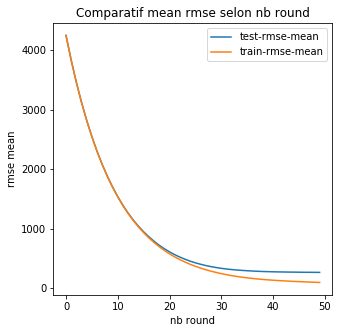

In [21]:
fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(111)

ax1.plot(cv_results["test-rmse-mean"],label='test-rmse-mean')
ax1.plot(cv_results["train-rmse-mean"],label='train-rmse-mean')
ax1.set_ylabel('rmse mean')
ax1.set_xlabel('nb round')
ax1.legend(loc='best')
ax1.set_title('Comparatif mean rmse selon nb round');

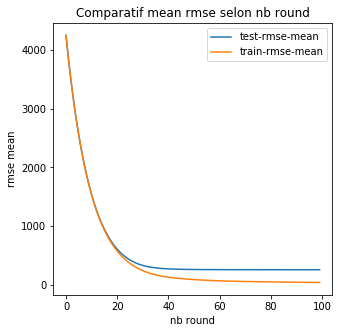

In [22]:
cv_results2 = xgb.cv(dtrain=dnorm, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

fig=plt.figure(figsize=(5,5))
ax1=fig.add_subplot(111)

ax1.plot(cv_results2["test-rmse-mean"],label='test-rmse-mean')
ax1.plot(cv_results2["train-rmse-mean"],label='train-rmse-mean')
ax1.set_ylabel('rmse mean')
ax1.set_xlabel('nb round')
ax1.legend(loc='best')
ax1.set_title('Comparatif mean rmse selon nb round');

In [0]:
from xgboost import XGBRegressor

estimator = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42,
    n_estimators = 40 ################ On prend 40 rounds ####################
)


params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
parameters = {
    'max_depth': range (2, 6, 1),
    'colsample_bytree': np.arange(0.1, 0.4,0.1),
    'alpha': np.arange(1,10,1),
    'learning_rate': np.arange(0.01, 0.1,0.01)
}

In [0]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

In [25]:
# On l'entraine sur le set d'entrainement
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   35.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.8min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 16.6min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 25.7min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 37.5min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 52.4min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 69.0min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 88.2min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 111.0min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 133.1min
[Parallel(n_jobs=5)]: Done 6480 out of 6480 | elapsed: 144.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=40, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, re...
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'colsample_bytree': array([0.1, 0.2, 0.3, 0.4]),

In [26]:
grid_search.best_estimator_

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.30000000000000004, gamma=0,
             importance_type='gain', learning_rate=0.09, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

In [0]:
results = pd.DataFrame(grid_search.cv_results_)

In [28]:
ypred_rs=grid_search.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, ypred_rs))
diff_rs=abs(y_test-ypred_rs)
print("RMSE_grid_search: %f" % (rmse2))
print("Nous passons donc d'une rmse de ",round(rmse,2)," avant le paramètrage des hyperparamètres à une rsme de ",round(rmse2,2)," après paramètrage des hyperparamètres." )

RMSE_grid_search: 390.228859
Nous passons donc d'une rmse de  318.48  avant le paramètrage des hyperparamètres à une rsme de  390.23  après paramètrage des hyperparamètres.


In [0]:
y_pred = ypred_rs
y_train_pred = grid_search.predict(X_train)

# Evaluation des résultats

In [30]:
# On affiche la racine de l'erreur quadratique moyenne

print("La racine carrée de l'erreur quadratique moyenne sur les données d'entrainement : ", np.round(np.sqrt(mean_squared_error(y_train_pred, y_train))))
print("La racine carrée de l'erreur quadratique moyenne sur les données de test : ", np.round(np.sqrt(mean_squared_error(y_pred, y_test))))

La racine carrée de l'erreur quadratique moyenne sur les données d'entrainement :  275.0
La racine carrée de l'erreur quadratique moyenne sur les données de test :  390.0


In [31]:
# On crée un DataFrame qui contient les valeurs prédites et les valeurs réelles pour l'échantillon de test
df_result = pd.DataFrame()
df_result['BTC_Close_Reel'] = y_test
df_result['BTC_Close_Pred'] = y_pred
df_result.head(10)

,BTC_Close_Reel,BTC_Close_Pred
Date,,
2019-11-30,7569,7537.498535
2019-11-29,7761,7348.210449
2019-11-28,7463,7214.006348
2019-11-27,7531,7164.285645
2019-11-26,7218,7087.679199
2019-11-25,7146,6981.739746
2019-11-24,7047,7348.210449
2019-11-23,7397,7218.222656
2019-11-22,7296,7706.064453


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


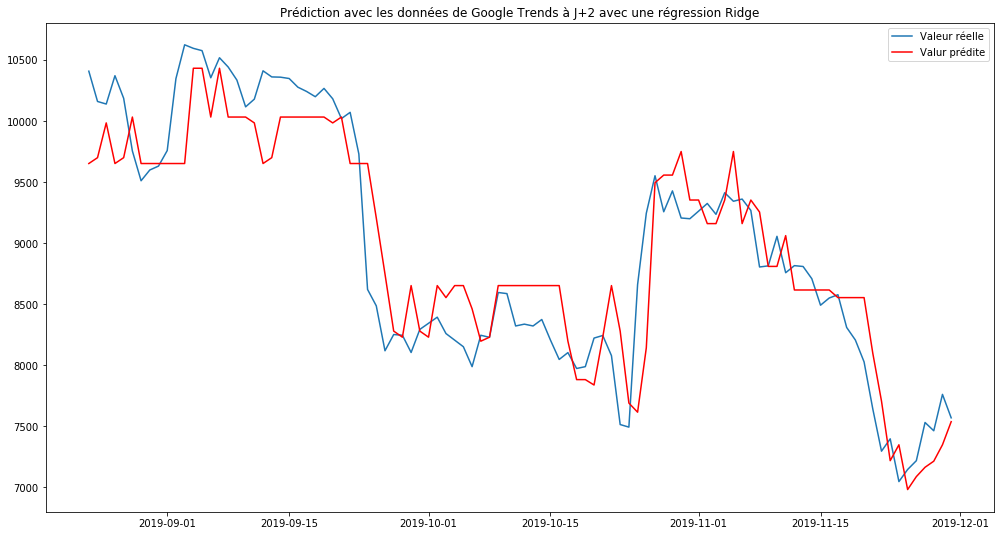

In [32]:
# On affiche les deux courbes pour comparer
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Close_Reel'], label='Valeur réelle')
plt.plot(df_result.index, df_result['BTC_Close_Pred'], color='r', label='Valur prédite')
plt.title('Prédiction avec les données de Google Trends à J+2 avec une régression Ridge')
plt.legend()
plt.show()